# Bruise Detection using differemt CNN Architectures

This notebook contains comprehensive comparison framework that tests various CNN designs and analyzes their performance for binary bruise detection (bruise vs normal skin).

### Import libraries and setup

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score
import pandas as pd
from datetime import datetime
import time
import os
from PIL import Image
from sklearn.model_selection import train_test_split

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### Data Loading and Preprocessing

In [20]:
def load_binary_data(data_dir='C:/Users/tdany/OneDrive/Desktop/bruise_detection_project/dataset/Wound_dataset copy', img_size=(224, 224)):
    images = []
    labels = []
    
    # Process bruise images (positive class)
    bruise_path = os.path.join(data_dir, 'Bruises')
    if os.path.exists(bruise_path):
        for img_name in os.listdir(bruise_path):
            if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(bruise_path, img_name)
                try:
                    img = Image.open(img_path)
                    img = img.convert('RGB')
                    img = img.resize(img_size)
                    img_array = np.array(img) / 255.0
                    
                    images.append(img_array)
                    labels.append(1)  # 1 for bruise
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")
    
    # Process normal skin images (negative class)
    normal_path = os.path.join(data_dir, 'Normal')
    if os.path.exists(normal_path):
        for img_name in os.listdir(normal_path):
            if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(normal_path, img_name)
                try:
                    img = Image.open(img_path)
                    img = img.convert('RGB')
                    img = img.resize(img_size)
                    img_array = np.array(img) / 255.0
                    
                    images.append(img_array)
                    labels.append(0)  # 0 for normal
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")
    
    return np.array(images), np.array(labels)

In [21]:
# Load the dataset
X, y = load_binary_data()
print("Dataset shape:", X.shape)
print("Number of bruise images:", np.sum(y == 1))
print("Number of normal images:", np.sum(y == 0))

Dataset shape: (442, 224, 224, 3)
Number of bruise images: 242
Number of normal images: 200


### Shallow CNN architectures

In [22]:
def create_shallow_cnn(input_shape, kernel_size=3, use_batch_norm=False, activation='relu'):
    """Shallow CNN with 2 conv layers"""
    model = models.Sequential([
        layers.Input(shape=input_shape),
        
        # First conv block
        layers.Conv2D(32, (kernel_size, kernel_size), activation=activation, padding='same'),
    ])
    
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Second conv block
    model.add(layers.Conv2D(64, (kernel_size, kernel_size), activation=activation, padding='same'))
    
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation=activation))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

def create_shallow_cnn_leaky(input_shape, kernel_size=3, use_batch_norm=False):
    """Shallow CNN with LeakyReLU"""
    model = models.Sequential([
        layers.Input(shape=input_shape),
        
        # First conv block
        layers.Conv2D(32, (kernel_size, kernel_size), padding='same'),
        layers.LeakyReLU(alpha=0.01),
    ])
    
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Second conv block
    model.add(layers.Conv2D(64, (kernel_size, kernel_size), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.01))
    
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64))
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

### Deep CNN architectures

In [23]:
def create_deep_cnn(input_shape, kernel_size=3, use_batch_norm=False, activation='relu'):
    """Deep CNN with 4-5 conv layers"""
    model = models.Sequential([
        layers.Input(shape=input_shape),
        
        # First conv block
        layers.Conv2D(32, (kernel_size, kernel_size), activation=activation, padding='same'),
    ])
    
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Second conv block
    model.add(layers.Conv2D(64, (kernel_size, kernel_size), activation=activation, padding='same'))
    
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Third conv block
    model.add(layers.Conv2D(128, (kernel_size, kernel_size), activation=activation, padding='same'))
    
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Fourth conv block
    model.add(layers.Conv2D(256, (kernel_size, kernel_size), activation=activation, padding='same'))
    
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Fifth conv block
    model.add(layers.Conv2D(512, (kernel_size, kernel_size), activation=activation, padding='same'))
    
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    
    model.add(layers.GlobalAveragePooling2D())
    
    # Dense layers
    model.add(layers.Dense(128, activation=activation))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation=activation))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

def create_deep_cnn_leaky(input_shape, kernel_size=3, use_batch_norm=False):
    """Deep CNN with LeakyReLU"""
    model = models.Sequential([
        layers.Input(shape=input_shape),
        
        # First conv block
        layers.Conv2D(32, (kernel_size, kernel_size), padding='same'),
        layers.LeakyReLU(alpha=0.01),
    ])
    
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Second conv block
    model.add(layers.Conv2D(64, (kernel_size, kernel_size), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.01))
    
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Third conv block
    model.add(layers.Conv2D(128, (kernel_size, kernel_size), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.01))
    
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Fourth conv block
    model.add(layers.Conv2D(256, (kernel_size, kernel_size), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.01))
    
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Fifth conv block
    model.add(layers.Conv2D(512, (kernel_size, kernel_size), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.01))
    
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    
    model.add(layers.GlobalAveragePooling2D())
    
    # Dense layers
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64))
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

### Training and evaluation functions

In [24]:
def train_and_evaluate_model(model, model_name, X_train, X_val, X_test, y_train, y_val, y_test, 
                            epochs=15, batch_size=32):
    """Train model and collect metrics"""
    print(f"\n{'='*50}")
    print(f"Training: {model_name}")
    print(f"{'='*50}")
    
    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', 'Precision', 'Recall']
    )
    
    # Display model summary
    print(f"Parameters: {model.count_params():,}")
    
    # Record start time
    start_time = time.time()
    
    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        verbose=1
    )
    
    # Record training time
    training_time = time.time() - start_time
    
    # Evaluate on test set
    test_loss, test_accuracy, test_precision, test_recall = model.evaluate(
        X_test, y_test, verbose=0
    )
    
    # Make predictions
    y_pred_prob = model.predict(X_test, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Calculate F1 score and AUC
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Store results
    result = {
        'Model': model_name,
        'Parameters': model.count_params(),
        'Training_Time': training_time,
        'Test_Accuracy': test_accuracy,
        'Test_Precision': test_precision,
        'Test_Recall': test_recall,
        'F1_Score': f1,
        'AUC': roc_auc,
        'History': history,
        'Predictions': y_pred_prob,
        'Trained_Model': model
    }
    
    print(f"Training Time: {training_time:.2f}s")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    
    return result

In [25]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

input_shape = X_train[0].shape
print(f"Input shape: {input_shape}")

Input shape: (224, 224, 3)


### Train Shallow CNNs

In [26]:
def train_shallow_cnns(X_train, X_val, X_test, y_train, y_val, y_test, input_shape, results):
    """Train all shallow CNN configurations"""
    print("TRAINING SHALLOW CNN ARCHITECTURES")
    print("="*60)
    
    # Shallow CNN configurations
    shallow_configs = [
        {'kernel': 3, 'batch_norm': False, 'activation': 'relu', 'name': 'shallow_k3_no_bn_relu'},
        {'kernel': 3, 'batch_norm': True, 'activation': 'relu', 'name': 'shallow_k3_bn_relu'},
        {'kernel': 5, 'batch_norm': False, 'activation': 'relu', 'name': 'shallow_k5_no_bn_relu'},
        {'kernel': 5, 'batch_norm': True, 'activation': 'relu', 'name': 'shallow_k5_bn_relu'},
        {'kernel': 3, 'batch_norm': False, 'activation': 'leaky', 'name': 'shallow_k3_no_bn_leaky'},
        {'kernel': 3, 'batch_norm': True, 'activation': 'leaky', 'name': 'shallow_k3_bn_leaky'},
    ]
    
    for config in shallow_configs:
        if config['activation'] == 'leaky':
            model = create_shallow_cnn_leaky(input_shape, config['kernel'], config['batch_norm'])
        else:
            model = create_shallow_cnn(input_shape, config['kernel'], config['batch_norm'], config['activation'])
        
        result = train_and_evaluate_model(model, config['name'], X_train, X_val, X_test, 
                                        y_train, y_val, y_test)
        results.append(result)
    
    return results

### Train Deep CNNs

In [27]:
def train_deep_cnns(X_train, X_val, X_test, y_train, y_val, y_test, input_shape, results):
    """Train all deep CNN configurations"""
    print("\nTRAINING DEEP CNN ARCHITECTURES")
    print("="*60)
    
    # Deep CNN configurations
    deep_configs = [
        {'kernel': 3, 'batch_norm': False, 'activation': 'relu', 'name': 'deep_k3_no_bn_relu'},
        {'kernel': 3, 'batch_norm': True, 'activation': 'relu', 'name': 'deep_k3_bn_relu'},
        {'kernel': 5, 'batch_norm': False, 'activation': 'relu', 'name': 'deep_k5_no_bn_relu'},
        {'kernel': 5, 'batch_norm': True, 'activation': 'relu', 'name': 'deep_k5_bn_relu'},
        {'kernel': 3, 'batch_norm': False, 'activation': 'leaky', 'name': 'deep_k3_no_bn_leaky'},
        {'kernel': 3, 'batch_norm': True, 'activation': 'leaky', 'name': 'deep_k3_bn_leaky'},
    ]
    
    for config in deep_configs:
        if config['activation'] == 'leaky':
            model = create_deep_cnn_leaky(input_shape, config['kernel'], config['batch_norm'])
        else:
            model = create_deep_cnn(input_shape, config['kernel'], config['batch_norm'], config['activation'])
        
        result = train_and_evaluate_model(model, config['name'], X_train, X_val, X_test, 
                                        y_train, y_val, y_test)
        results.append(result)
    
    return results

### Results summary table

In [28]:
def print_results_table(results):
    """Print detailed comparison table"""
    results_df = pd.DataFrame([{
        'Model': r['Model'],
        'Parameters': f"{r['Parameters']:,}",
        'Accuracy': f"{r['Test_Accuracy']:.4f}",
        'Precision': f"{r['Test_Precision']:.4f}",
        'Recall': f"{r['Test_Recall']:.4f}",
        'F1-Score': f"{r['F1_Score']:.4f}",
        'AUC': f"{r['AUC']:.4f}",
        'Train Time (s)': f"{r['Training_Time']:.1f}",
    } for r in results])
    
    print("\n" + "="*120)
    print("DETAILED RESULTS COMPARISON")
    print("="*120)
    print(results_df.to_string(index=False))
    
    # Find best models
    best_accuracy = max(results, key=lambda x: x['Test_Accuracy'])
    best_f1 = max(results, key=lambda x: x['F1_Score'])
    best_auc = max(results, key=lambda x: x['AUC'])
    fastest = min(results, key=lambda x: x['Training_Time'])
    
    print(f"\n{'='*60}")
    print("BEST PERFORMING MODELS")
    print(f"{'='*60}")
    print(f"Best Accuracy: {best_accuracy['Model']} ({best_accuracy['Test_Accuracy']:.4f})")
    print(f"Best F1-Score: {best_f1['Model']} ({best_f1['F1_Score']:.4f})")
    print(f"Best AUC: {best_auc['Model']} ({best_auc['AUC']:.4f})")
    print(f"Fastest Training: {fastest['Model']} ({fastest['Training_Time']:.1f}s)")

### Batch normalization impact analysis

In [29]:
def analyze_batch_norm(results):
    """Analyze batch normalization impact"""
    df = pd.DataFrame(results)
    df['Depth'] = df['Model'].str.split('_').str[0]
    df['Batch_Norm'] = df['Model'].str.contains('_bn_')
    df['Activation'] = df['Model'].str.split('_').str[-1]
    
    print("="*80)
    print("BATCH NORMALIZATION IMPACT ANALYSIS")
    print("="*80)
    
    # Overall impact
    with_bn = df[df['Batch_Norm'] == True]
    without_bn = df[df['Batch_Norm'] == False]
    
    print(f"Overall Impact:")
    print(f"  With BatchNorm - Avg Accuracy: {with_bn['Test_Accuracy'].mean():.4f}")
    print(f"  Without BatchNorm - Avg Accuracy: {without_bn['Test_Accuracy'].mean():.4f}")
    improvement = ((with_bn['Test_Accuracy'].mean() - without_bn['Test_Accuracy'].mean())/without_bn['Test_Accuracy'].mean())*100
    print(f"  Improvement: {improvement:.2f}%")
    
    # Impact by architecture depth
    print(f"\nImpact by Architecture Depth:")
    for depth in ['shallow', 'deep']:
        depth_data = df[df['Depth'] == depth]
        with_bn_depth = depth_data[depth_data['Batch_Norm'] == True]['Test_Accuracy'].mean()
        without_bn_depth = depth_data[depth_data['Batch_Norm'] == False]['Test_Accuracy'].mean()
        improvement = ((with_bn_depth - without_bn_depth)/without_bn_depth)*100
        
        print(f"  {depth.capitalize()} CNN:")
        print(f"    With BN: {with_bn_depth:.4f}")
        print(f"    Without BN: {without_bn_depth:.4f}")
        print(f"    Improvement: {improvement:.2f}%")
    
    # Training time impact
    print(f"\nTraining Time Impact:")
    print(f"  With BatchNorm - Avg Time: {with_bn['Training_Time'].mean():.1f}s")
    print(f"  Without BatchNorm - Avg Time: {without_bn['Training_Time'].mean():.1f}s")
    time_diff = ((with_bn['Training_Time'].mean() - without_bn['Training_Time'].mean())/without_bn['Training_Time'].mean())*100
    print(f"  Time Increase: {time_diff:.1f}%")


### Activation function and kernel size analysis

In [30]:
def analyze_activation_and_kernels(results):
    """Analyze activation functions and kernel sizes"""
    df = pd.DataFrame(results)
    df['Depth'] = df['Model'].str.split('_').str[0]
    df['Kernel_Size'] = df['Model'].str.extract(r'k(\d+)')[0].astype(int)
    df['Activation'] = df['Model'].str.split('_').str[-1]
    
    print("="*80)
    print("ACTIVATION FUNCTION ANALYSIS")
    print("="*80)
    
    # Overall comparison
    relu_results = df[df['Activation'] == 'relu']
    leaky_relu_results = df[df['Activation'] == 'leaky']
    
    print(f"Overall Performance:")
    print(f"  ReLU - Avg Accuracy: {relu_results['Test_Accuracy'].mean():.4f}")
    print(f"  LeakyReLU - Avg Accuracy: {leaky_relu_results['Test_Accuracy'].mean():.4f}")
    
    print(f"\nTraining Speed:")
    print(f"  ReLU - Avg Time: {relu_results['Training_Time'].mean():.1f}s")
    print(f"  LeakyReLU - Avg Time: {leaky_relu_results['Training_Time'].mean():.1f}s")
    
    print("="*80)
    print("KERNEL SIZE ANALYSIS")
    print("="*80)
    
    # Kernel size comparison
    k3_results = df[df['Kernel_Size'] == 3]
    k5_results = df[df['Kernel_Size'] == 5]
    
    print(f"Overall Performance:")
    print(f"  3x3 Kernels - Avg Accuracy: {k3_results['Test_Accuracy'].mean():.4f}")
    print(f"  5x5 Kernels - Avg Accuracy: {k5_results['Test_Accuracy'].mean():.4f}")
    
    print(f"\nTraining Speed:")
    print(f"  3x3 Kernels - Avg Time: {k3_results['Training_Time'].mean():.1f}s")
    print(f"  5x5 Kernels - Avg Time: {k5_results['Training_Time'].mean():.1f}s")
    
    print(f"\nParameter Count:")
    print(f"  3x3 Kernels - Avg Params: {k3_results['Parameters'].mean():,.0f}")
    print(f"  5x5 Kernels - Avg Params: {k5_results['Parameters'].mean():,.0f}")


### Evaluation

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from datetime import datetime
import matplotlib.patches as mpatches

def plot_comprehensive_comparison(results):
    """Create comprehensive comparison plots"""
    df = pd.DataFrame(results)
    
    # Parse model components
    df['Depth'] = df['Model'].str.split('_').str[0]
    df['Kernel_Size'] = df['Model'].str.extract(r'k(\d+)')[0].astype(int)
    df['Batch_Norm'] = df['Model'].str.contains('_bn_')
    df['Activation'] = df['Model'].str.split('_').str[-1]
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))

    # Accuracy vs Model Depth
    depth_comparison = df.groupby(['Depth', 'Batch_Norm']).agg({
        'Test_Accuracy': 'mean',
        'Parameters': 'mean'
    }).reset_index()

    def get_accuracy_safe(df, depth, bn):
        filtered = df[(df['Depth'] == depth) & (df['Batch_Norm'] == bn)]
        return filtered['Test_Accuracy'].values[0] if not filtered.empty else 0.0

    shallow_bn = get_accuracy_safe(depth_comparison, 'shallow', True)
    shallow_no_bn = get_accuracy_safe(depth_comparison, 'shallow', False)
    deep_bn = get_accuracy_safe(depth_comparison, 'deep', True)
    deep_no_bn = get_accuracy_safe(depth_comparison, 'deep', False)

    x = np.arange(2)
    width = 0.35
    ax = axes[0, 0]
    ax.bar(x - width/2, [shallow_no_bn, deep_no_bn], width, label='Without BatchNorm', alpha=0.7)
    ax.bar(x + width/2, [shallow_bn, deep_bn], width, label='With BatchNorm', alpha=0.7)
    ax.set_title('Accuracy vs Model Depth')
    ax.set_ylabel('Test Accuracy')
    ax.set_xticks(x)
    ax.set_xticklabels(['Shallow', 'Deep'])
    ax.legend()
    
    # Parameters vs Depth
    ax = axes[0, 1]
    shallow_params = df[df['Depth'] == 'shallow']['Parameters'].mean()
    deep_params = df[df['Depth'] == 'deep']['Parameters'].mean()
    ax.bar(['Shallow CNN', 'Deep CNN'], [shallow_params, deep_params], 
           color=['lightblue', 'darkblue'])
    ax.set_title('Parameter Count Comparison')
    ax.set_ylabel('Number of Parameters')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

    # Impact of Batch Normalization
    ax = axes[0, 2]
    bn_data = df.groupby(['Batch_Norm', 'Depth'])['Test_Accuracy'].mean().unstack()
    bn_data.plot(kind='bar', ax=ax, color=['lightcoral', 'darkred'])
    ax.set_title('Impact of Batch Normalization')
    ax.set_xlabel('Batch Normalization')
    ax.set_ylabel('Test Accuracy')
    ax.set_xticklabels(bn_data.index.map(lambda x: 'With BN' if x else 'Without BN'), rotation=0)
    ax.legend(title='Architecture')

    # Kernel Size Comparison
    ax = axes[1, 0]
    kernel_data = df.groupby(['Kernel_Size', 'Depth'])['Test_Accuracy'].mean().unstack()
    kernel_data.plot(kind='bar', ax=ax, color=['lightgreen', 'darkgreen'])
    ax.set_title('Kernel Size Impact')
    ax.set_xlabel('Kernel Size')
    ax.set_ylabel('Test Accuracy')
    ax.set_xticklabels(['3x3', '5x5'], rotation=0)
    ax.legend(title='Architecture')

    # Activation Function Comparison
    ax = axes[1, 1]
    activation_data = df.groupby(['Activation', 'Depth'])['Test_Accuracy'].mean().unstack()
    activation_data.plot(kind='bar', ax=ax, color=['orange', 'darkorange'])
    ax.set_title('Activation Function Impact')
    ax.set_xlabel('Activation Function')
    ax.set_ylabel('Test Accuracy')
    ax.set_xticklabels(['LeakyReLU', 'ReLU'], rotation=0)
    ax.legend(title='Architecture')

    # Training Time vs Accuracy
    ax = axes[1, 2]
    colors = ['red' if d == 'deep' else 'blue' for d in df['Depth']]
    scatter = ax.scatter(df['Training_Time'], df['Test_Accuracy'], c=colors, alpha=0.7, s=100)
    ax.set_xlabel('Training Time (seconds)')
    ax.set_ylabel('Test Accuracy')
    ax.set_title('Training Time vs Accuracy')
    blue_patch = mpatches.Patch(color='blue', label='Shallow CNN')
    red_patch = mpatches.Patch(color='red', label='Deep CNN')
    ax.legend(handles=[blue_patch, red_patch])

    plt.tight_layout()
    plt.show()
    
    # ROC Curves for Top 3 Models
    plt.figure(figsize=(12, 8))
    top_models = sorted(results, key=lambda x: x['AUC'], reverse=True)[:3]
    for model_result in top_models:
        y_pred_prob = model_result['Predictions']
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{model_result['Model']} (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.8)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves - Top 3 Models')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()


In [32]:
def generate_final_report(results):
    """Generate comprehensive final report"""
    df = pd.DataFrame(results)
    
    print("="*100)
    print("COMPREHENSIVE CNN ARCHITECTURE COMPARISON FOR BRUISE DETECTION")
    print("="*100)
    print(f"Study Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"Total Models Evaluated: {len(results)}")
    print(f"Dataset Size: {len(X)} images")
    print(f"Train/Val/Test Split: {len(X_train)}/{len(X_val)}/{len(X_test)}")
    
    print(f"\nOVERALL PERFORMANCE STATISTICS:")
    print(f"Average Accuracy: {df['Test_Accuracy'].mean():.4f} ± {df['Test_Accuracy'].std():.4f}")
    print(f"Average F1-Score: {df['F1_Score'].mean():.4f} ± {df['F1_Score'].std():.4f}")
    print(f"Average AUC: {df['AUC'].mean():.4f} ± {df['AUC'].std():.4f}")
    print(f"Average Training Time: {df['Training_Time'].mean():.1f} ± {df['Training_Time'].std():.1f} seconds")

    best_accuracy = max(results, key=lambda x: x['Test_Accuracy'])
    best_f1 = max(results, key=lambda x: x['F1_Score'])
    best_auc = max(results, key=lambda x: x['AUC'])
    fastest = min(results, key=lambda x: x['Training_Time'])
    most_efficient = max(results, key=lambda x: x['Test_Accuracy'] / (x['Parameters'] / 1e6))

    df['Depth'] = df['Model'].str.split('_').str[0]
    df['Batch_Norm'] = df['Model'].str.contains('_bn_')
    df['Activation'] = df['Model'].str.split('_').str[-1]

    shallow_acc = df[df['Depth'] == 'shallow']['Test_Accuracy'].mean()
    deep_acc = df[df['Depth'] == 'deep']['Test_Accuracy'].mean()
    with_bn = df[df['Batch_Norm']]['Test_Accuracy'].mean()
    without_bn = df[~df['Batch_Norm']]['Test_Accuracy'].mean()
    relu_acc = df[df['Activation'] == 'relu']['Test_Accuracy'].mean()
    leaky_acc = df[df['Activation'] == 'leaky']['Test_Accuracy'].mean()

    print(f"\nTOP PERFORMING MODELS:")
    print(f"Best Overall Accuracy: {best_accuracy['Model']} - {best_accuracy['Test_Accuracy']:.4f}")
    print(f"Best F1-Score: {best_f1['Model']} - {best_f1['F1_Score']:.4f}")
    print(f"Best AUC: {best_auc['Model']} - {best_auc['AUC']:.4f}")
    print(f"Fastest Training: {fastest['Model']} - {fastest['Training_Time']:.1f} seconds")
    print(f"Most Parameter Efficient: {most_efficient['Model']} - {most_efficient['Test_Accuracy']:.4f} acc / {most_efficient['Parameters'] / 1e6:.1f}M params")

    print(f"\nARCHITECTURE INSIGHTS:")
    print(f"Shallow vs Deep CNNs: {shallow_acc:.4f} vs {deep_acc:.4f}")
    print(f"Batch Normalization Impact: {with_bn:.4f} vs {without_bn:.4f}")
    print(f"Activation Functions: ReLU {relu_acc:.4f} vs LeakyReLU {leaky_acc:.4f}")

    print(f"\nRECOMMENDATIONS:")
    print(f"1. Best Model for Production: {best_accuracy['Model']}")
    print(f"2. Best Model for Resource-Constrained Environments: {fastest['Model']}")
    print(f"3. Most Balanced Model: {most_efficient['Model']}")


In [33]:
# Main execution
if __name__ == "__main__":
    # Initialize results list
    results = []
    
    # Train all models
    print("STARTING COMPREHENSIVE CNN ARCHITECTURE COMPARISON")
    print("="*80)
    
    # Train shallow CNNs
    results = train_shallow_cnns(X_train, X_val, X_test, y_train, y_val, y_test, input_shape, results)
    
    # Train deep CNNs
    results = train_deep_cnns(X_train, X_val, X_test, y_train, y_val, y_test, input_shape, results)
    
    # Print detailed results
    print_results_table(results)
    
    # Detailed analyses
    analyze_batch_norm(results)
    analyze_activation_and_kernels(results)

    print("\n" + "="*80)
    print("STUD COMPLETED SUCCESSFULLY!")
    print("="*80)

STARTING COMPREHENSIVE CNN ARCHITECTURE COMPARISON
TRAINING SHALLOW CNN ARCHITECTURES

Training: shallow_k3_no_bn_relu
Parameters: 12,864,577
Epoch 1/15
10/10 [==============================] - 8s 690ms/step - loss: 3.1477 - accuracy: 0.5663 - precision: 0.5846 - recall: 0.6826 - val_loss: 0.5716 - val_accuracy: 0.7978 - val_precision: 0.8571 - val_recall: 0.7500
Epoch 2/15
10/10 [==============================] - 6s 614ms/step - loss: 0.5771 - accuracy: 0.6990 - precision: 0.6516 - recall: 0.9521 - val_loss: 0.4903 - val_accuracy: 0.8202 - val_precision: 0.8333 - val_recall: 0.8333
Epoch 3/15
10/10 [==============================] - 6s 613ms/step - loss: 0.4272 - accuracy: 0.8544 - precision: 0.8211 - recall: 0.9341 - val_loss: 0.3858 - val_accuracy: 0.8315 - val_precision: 0.9714 - val_recall: 0.7083
Epoch 4/15
10/10 [==============================] - 6s 613ms/step - loss: 0.6287 - accuracy: 0.7767 - precision: 0.8025 - recall: 0.7784 - val_loss: 0.4943 - val_accuracy: 0.7640 - val_p

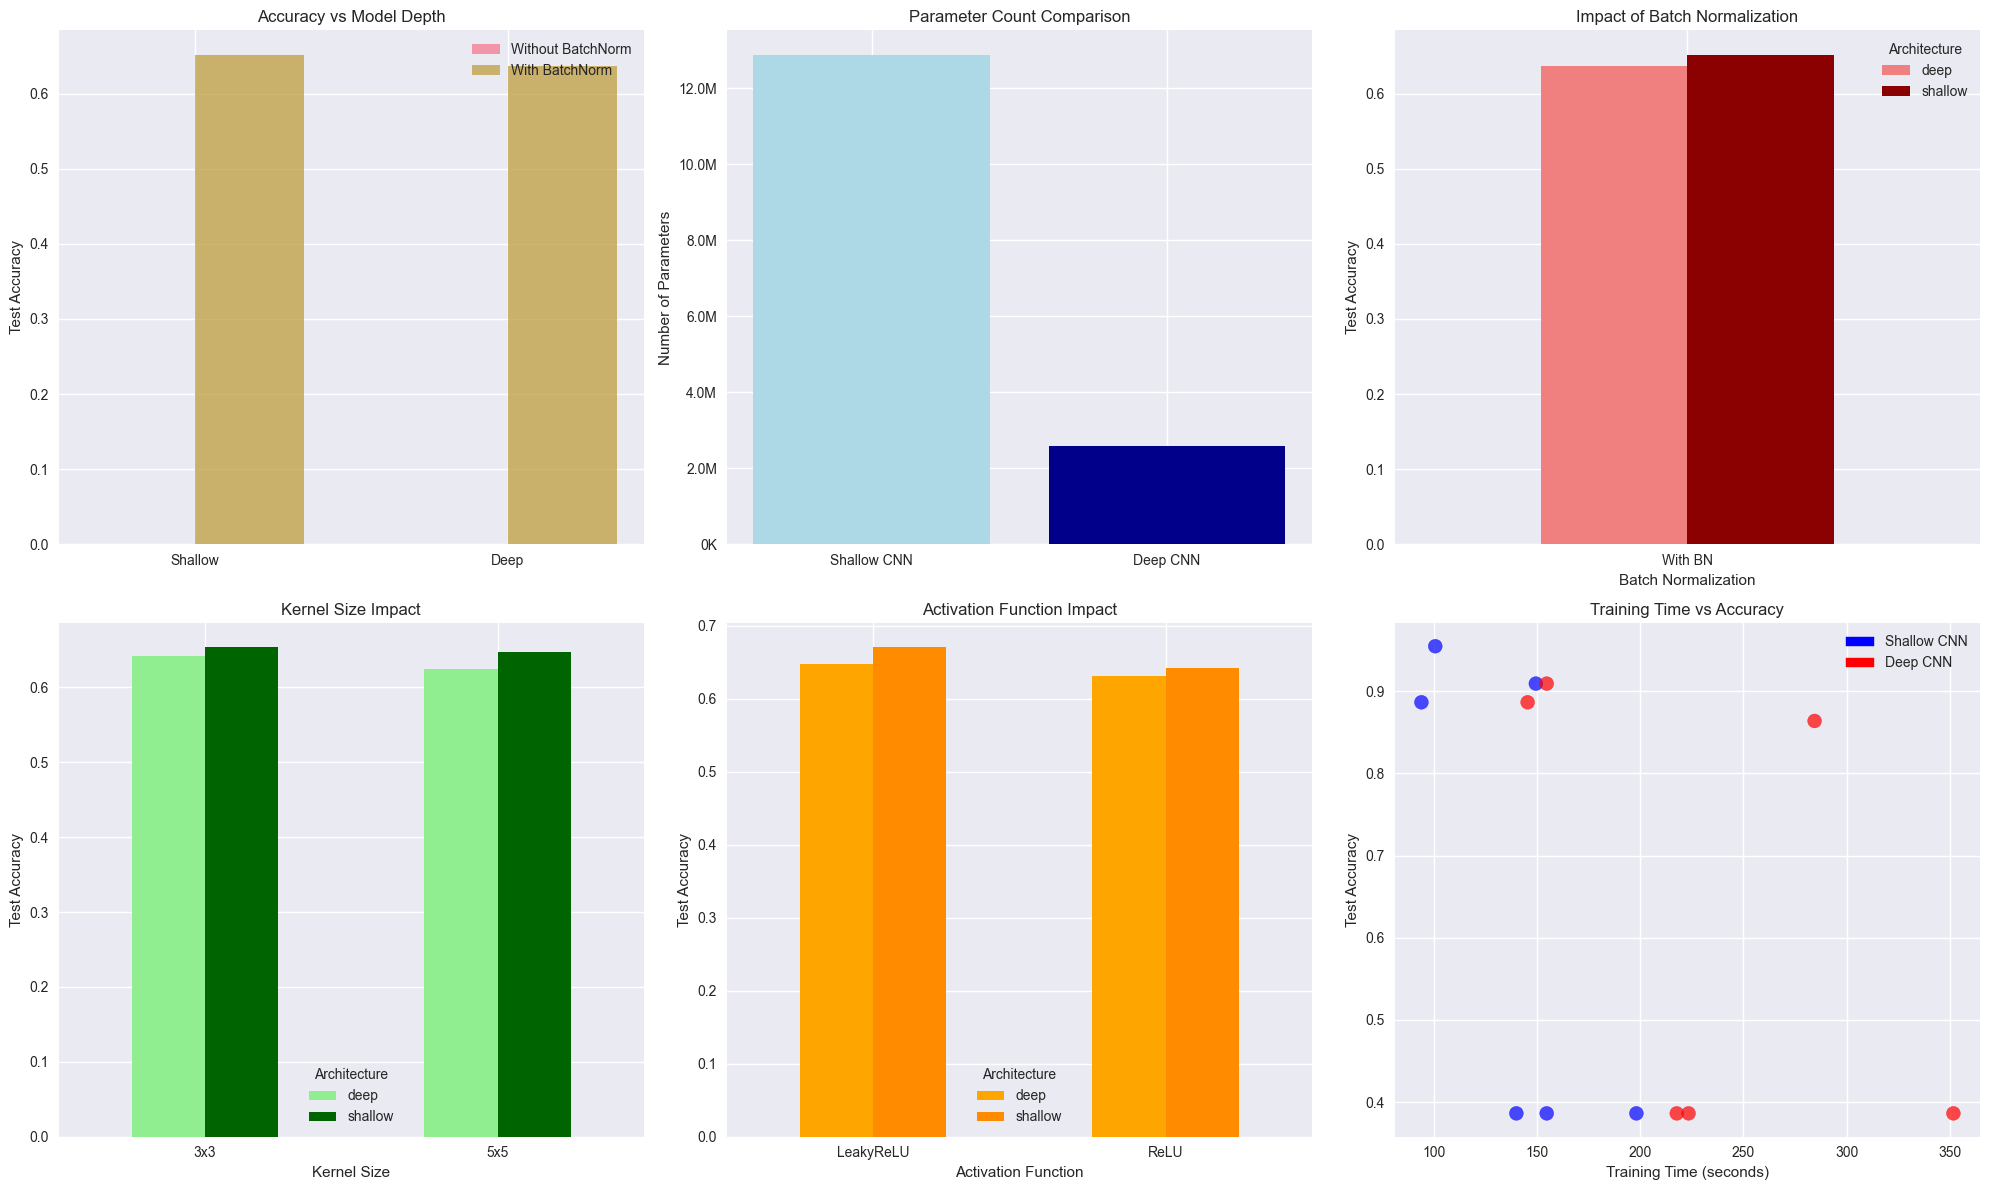

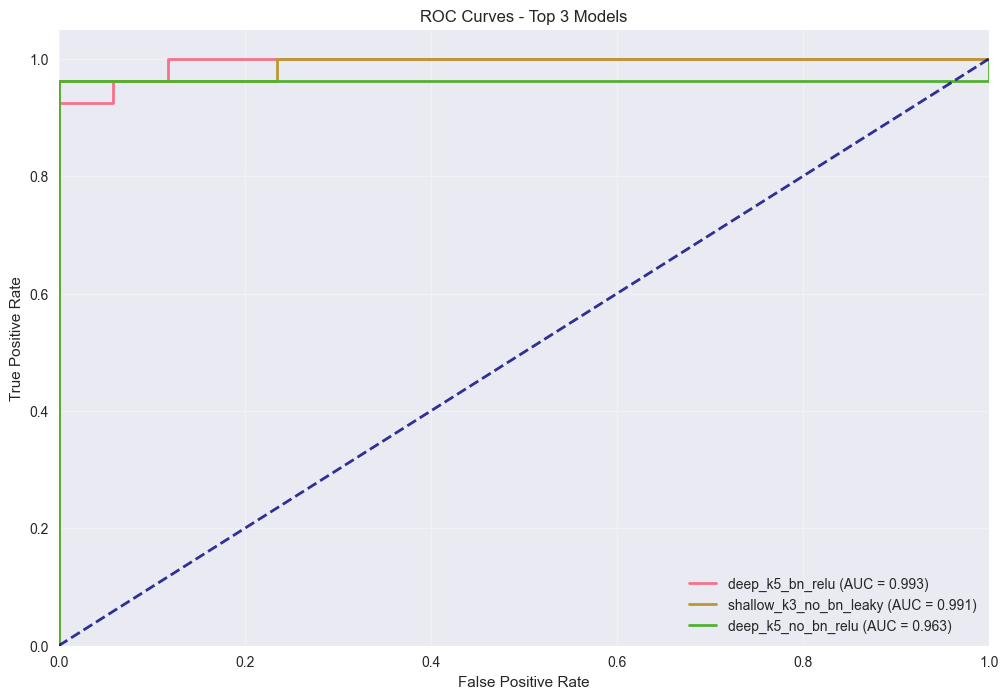

COMPREHENSIVE CNN ARCHITECTURE COMPARISON FOR BRUISE DETECTION
Study Date: 2025-06-13 23:09:18
Total Models Evaluated: 12
Dataset Size: 442 images
Train/Val/Test Split: 309/89/44

OVERALL PERFORMANCE STATISTICS:
Average Accuracy: 0.6439 ± 0.2698
Average F1-Score: 0.4564 ± 0.4771
Average AUC: 0.8147 ± 0.2163
Average Training Time: 184.5 ± 75.4 seconds

TOP PERFORMING MODELS:
Best Overall Accuracy: shallow_k3_no_bn_leaky - 0.9545
Best F1-Score: shallow_k3_no_bn_leaky - 0.9630
Best AUC: deep_k5_bn_relu - 0.9935
Fastest Training: shallow_k3_no_bn_relu - 93.9 seconds
Most Parameter Efficient: deep_k3_no_bn_leaky - 0.9091 acc / 1.6M params

ARCHITECTURE INSIGHTS:
Shallow vs Deep CNNs: 0.6515 vs 0.6364
Batch Normalization Impact: 0.6439 vs nan
Activation Functions: ReLU 0.6364 vs LeakyReLU 0.6591

RECOMMENDATIONS:
1. Best Model for Production: shallow_k3_no_bn_leaky
2. Best Model for Resource-Constrained Environments: shallow_k3_no_bn_relu
3. Most Balanced Model: deep_k3_no_bn_leaky


In [34]:
plot_comprehensive_comparison(results)
generate_final_report(results)

### Saving the Best Performing Models

In [ ]:
def save_best_models(results, save_dir="saved_models"):
    """Saves the best performing models based on Accuracy, F1-Score, AUC, and Training Time."""
    import os

    os.makedirs(save_dir, exist_ok=True)

    best_models = {
        'Best_Accuracy': max(results, key=lambda x: x['Test_Accuracy']),
        'Best_F1': max(results, key=lambda x: x['F1_Score']),
        'Best_AUC': max(results, key=lambda x: x['AUC']),
        'Fastest_Training': min(results, key=lambda x: x['Training_Time']),
        'Most_Efficient': max(results, key=lambda x: x['Test_Accuracy'] / (x['Parameters'] / 1e6))  
    }


    saved = set()
    for label, result in best_models.items():
        model_name = result['Model']
        filename = os.path.join(save_dir, f"{model_name}.h5")

        # Avoid saving the same model multiple times
        if model_name not in saved:
            result['Trained_Model'].save(filename)
            print(f"Saved {label} model: {model_name} → {filename}")
            saved.add(model_name)
        else:
            print(f"Skipped {label} model (already saved): {model_name}")


In [36]:
save_best_models(results) 

Saved Best_Accuracy model: shallow_k3_no_bn_leaky → saved_models\shallow_k3_no_bn_leaky.h5
Skipped Best_F1 model (already saved): shallow_k3_no_bn_leaky
Saved Best_AUC model: deep_k5_bn_relu → saved_models\deep_k5_bn_relu.h5
Saved Fastest_Training model: shallow_k3_no_bn_relu → saved_models\shallow_k3_no_bn_relu.h5
Saved Most_Efficient model: deep_k3_no_bn_leaky → saved_models\deep_k3_no_bn_leaky.h5


### Sample Predictions from the Best Performing Models

Below are example outputs generated by the top-performing models selected based on four key evaluation metrics: Accuracy, F1-Score, AUC (Area Under the ROC Curve), and Training Time.
These models represent the most effective trade-offs between predictive performance and computational efficiency. 

Loaded: deep_k3_no_bn_leaky
Loaded: deep_k5_bn_relu
Loaded: shallow_k3_no_bn_leaky
Loaded: shallow_k3_no_bn_relu

--- Image 1 ---
Path: C:/Users/tdany/OneDrive/Desktop/bruise_detection_project/dataset/Wound_dataset copy/Normal\mirrored_86.jpg


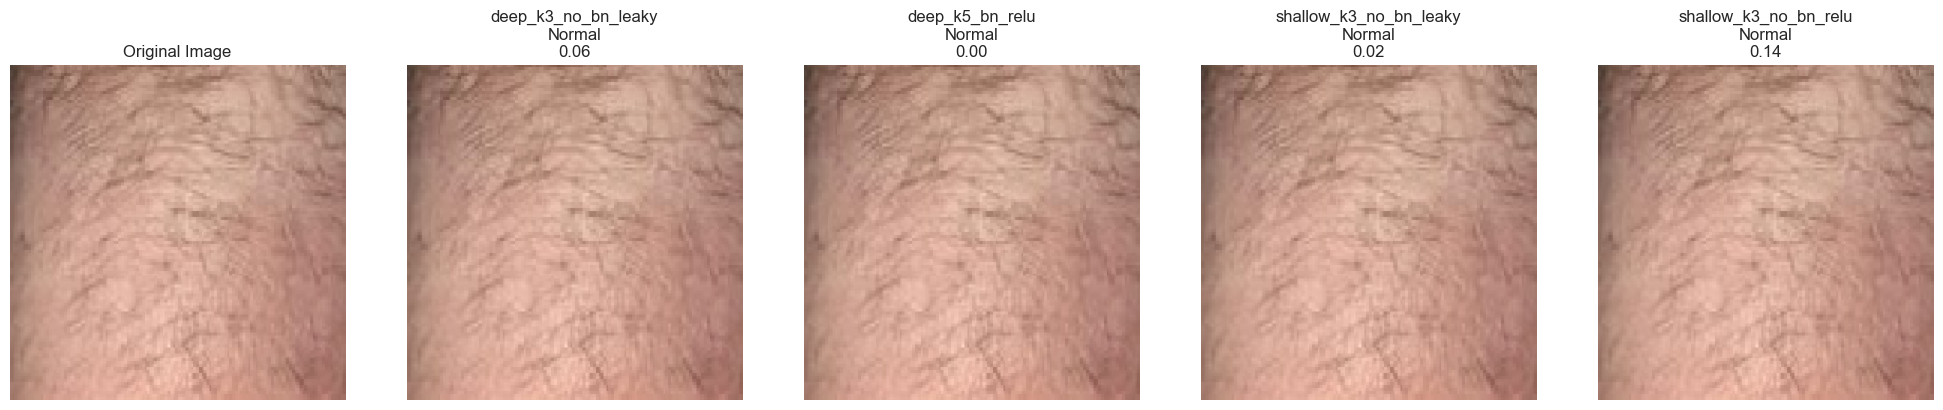


--- Image 2 ---
Path: C:/Users/tdany/OneDrive/Desktop/bruise_detection_project/dataset/Wound_dataset copy/Bruises\bruises (63).jpg


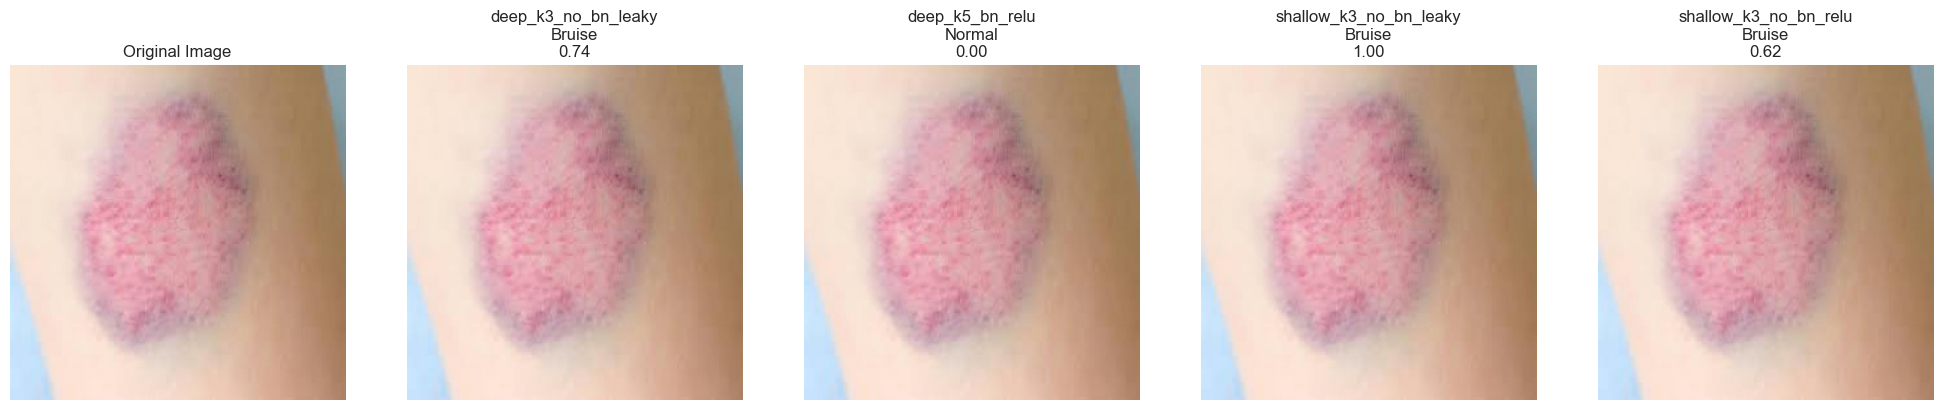


--- Image 3 ---
Path: C:/Users/tdany/OneDrive/Desktop/bruise_detection_project/dataset/Wound_dataset copy/Bruises\mirrored_bruises (105).jpg


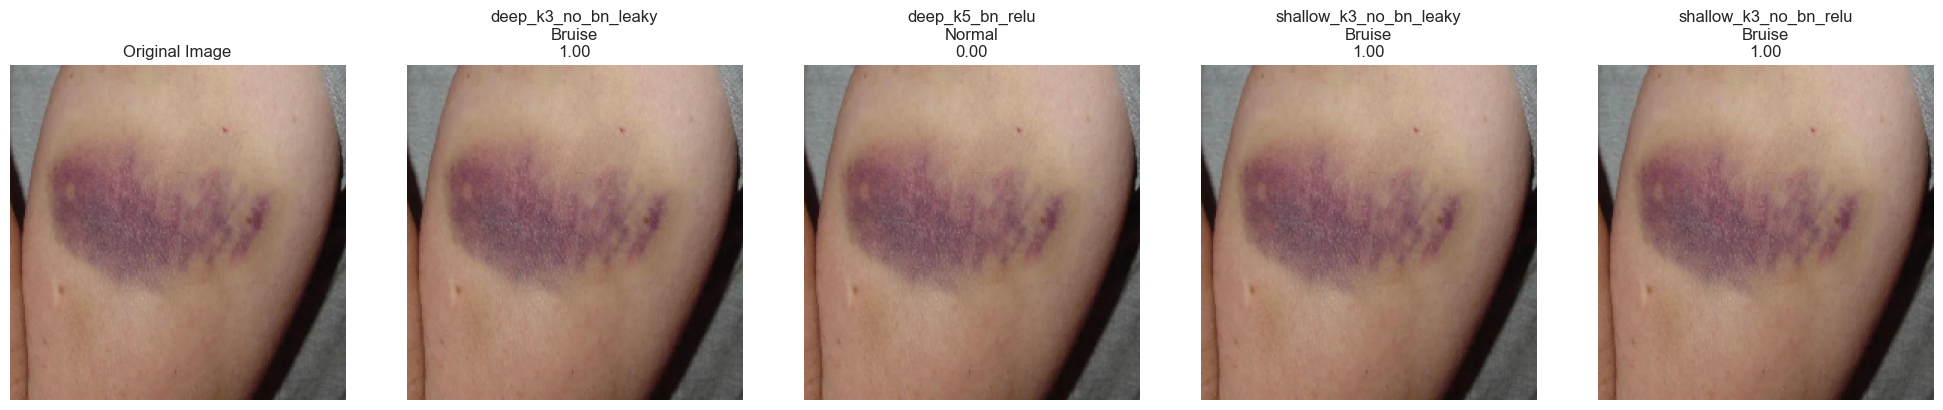


--- Image 4 ---
Path: C:/Users/tdany/OneDrive/Desktop/bruise_detection_project/dataset/Wound_dataset copy/Normal\19.jpg


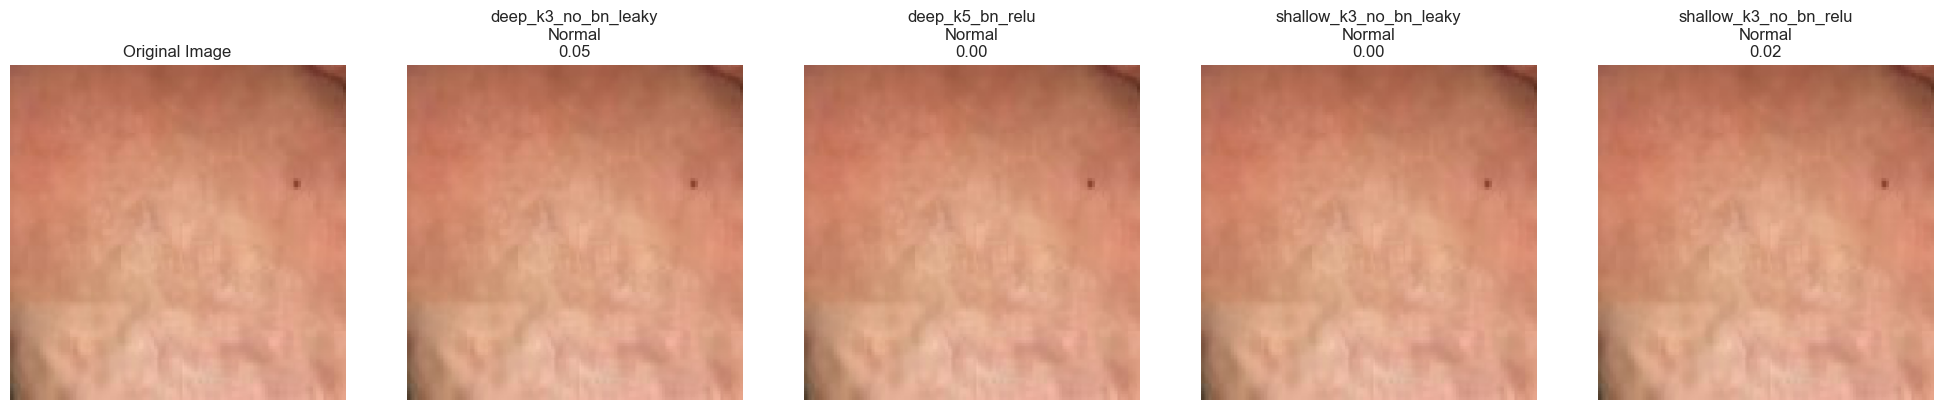


--- Image 5 ---
Path: C:/Users/tdany/OneDrive/Desktop/bruise_detection_project/dataset/Wound_dataset copy/Bruises\bruises (35).jpg


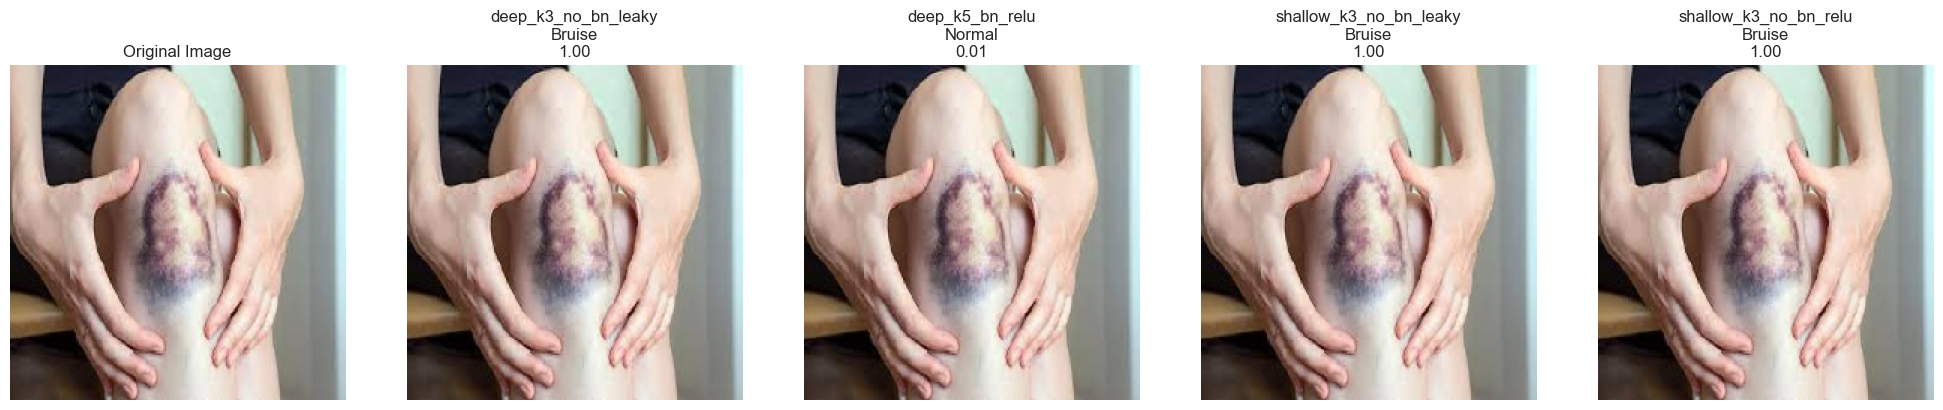


--- Image 6 ---
Path: C:/Users/tdany/OneDrive/Desktop/bruise_detection_project/dataset/Wound_dataset copy/Normal\29.jpg


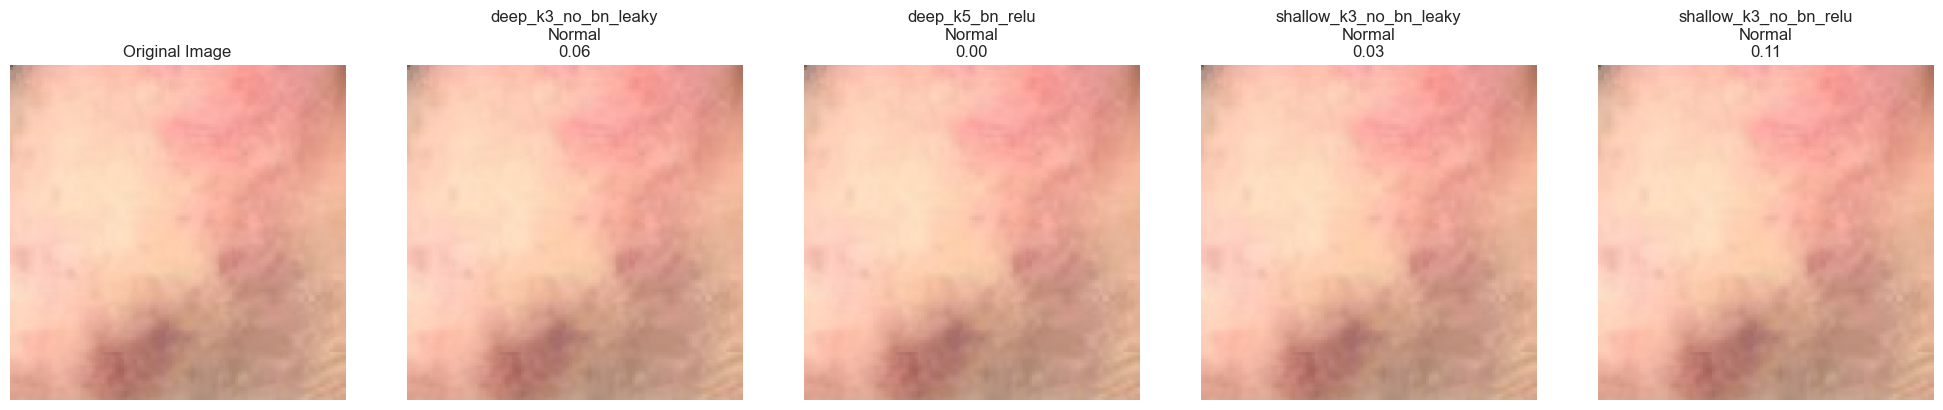


--- Image 7 ---
Path: C:/Users/tdany/OneDrive/Desktop/bruise_detection_project/dataset/Wound_dataset copy/Normal\mirrored_11.jpg


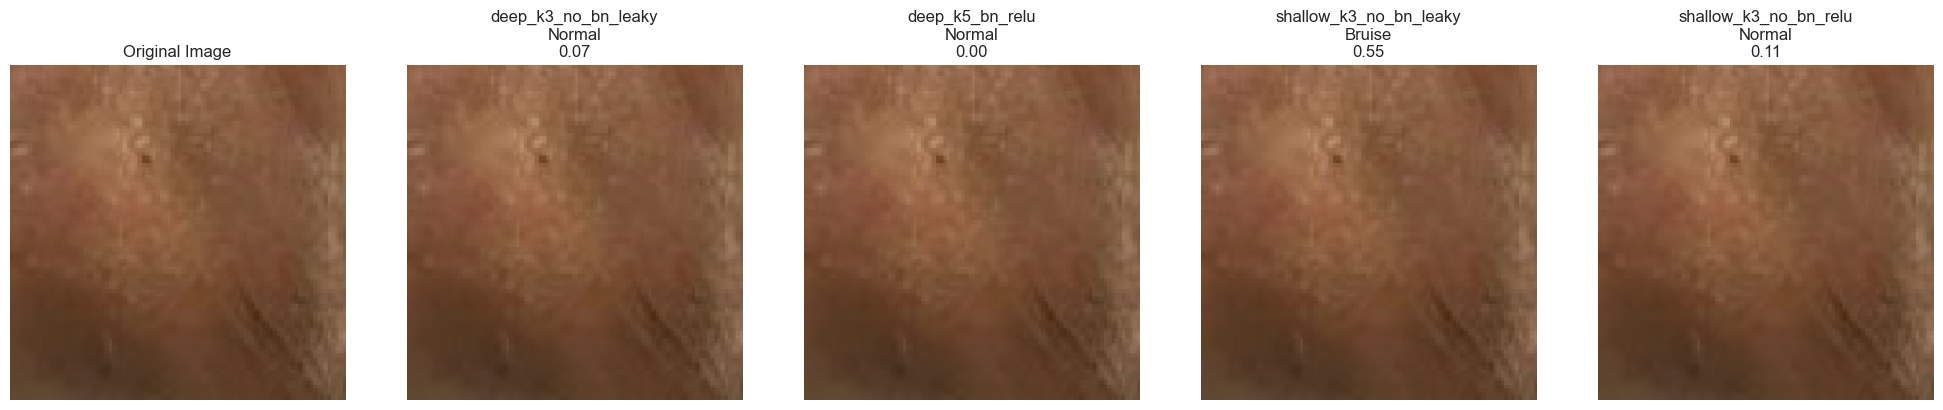


--- Image 8 ---
Path: C:/Users/tdany/OneDrive/Desktop/bruise_detection_project/dataset/Wound_dataset copy/Normal\61.jpg


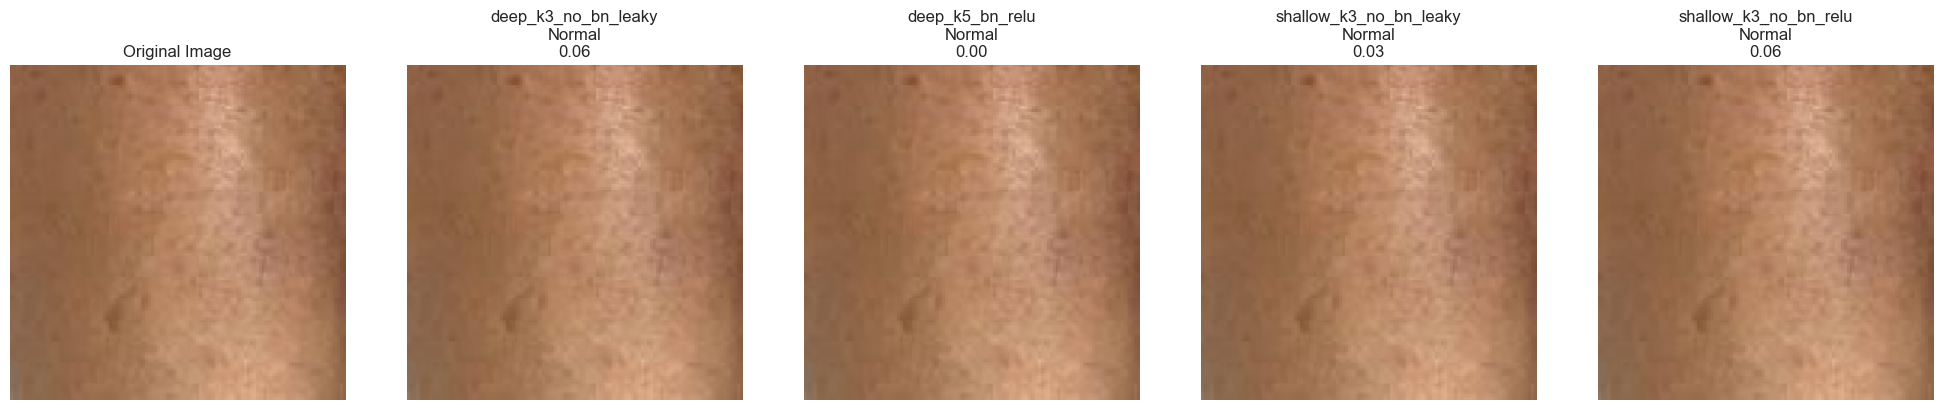


--- Image 9 ---
Path: C:/Users/tdany/OneDrive/Desktop/bruise_detection_project/dataset/Wound_dataset copy/Normal\52.jpg


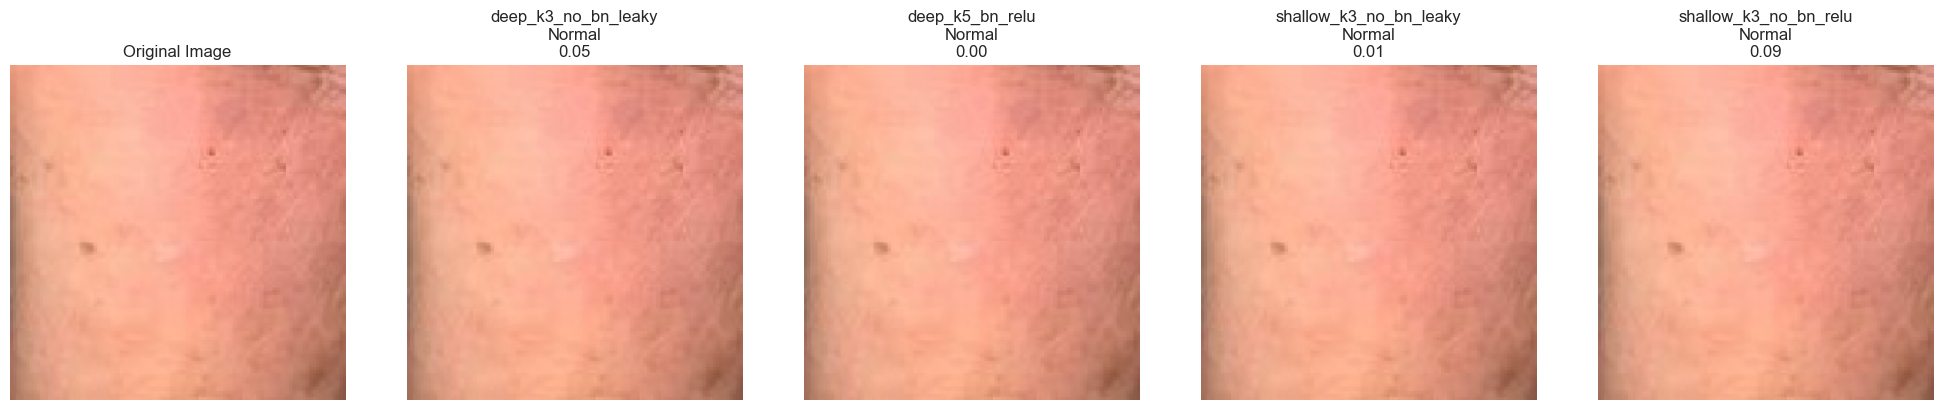


--- Image 10 ---
Path: C:/Users/tdany/OneDrive/Desktop/bruise_detection_project/dataset/Wound_dataset copy/Normal\15.jpg


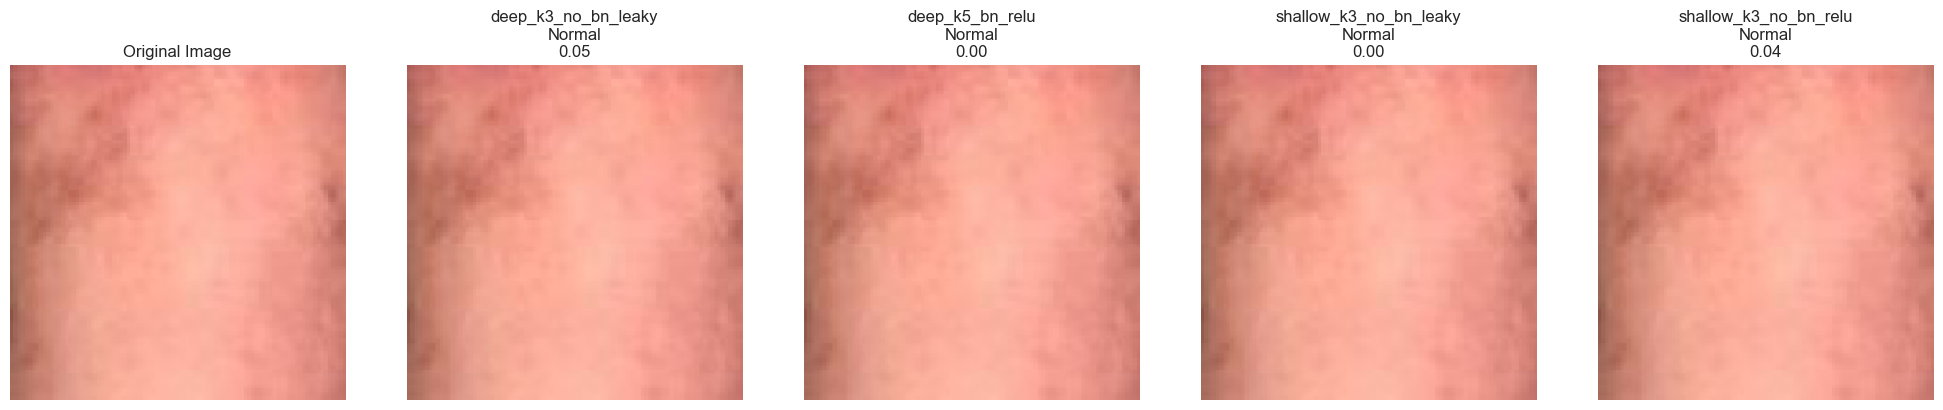

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

def load_models(save_dir="saved_models"):
    """Load all saved models."""
    models = {}
    
    for filename in os.listdir(save_dir):
        if filename.endswith('.h5'):
            model_name = filename[:-3]
            model_path = os.path.join(save_dir, filename)
            models[model_name] = load_model(model_path)
            print(f"Loaded: {model_name}")
    
    return models

def predict_and_show(models, img_path, class_names=None):
    """Predict on image and show results."""
    
    # Load and prepare image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = {}
    for model_name, model in models.items():
        pred = model.predict(img_array, verbose=0)
        
        if pred.shape[1] == 1: 
            confidence = pred[0][0]
            predicted_class = 1 if confidence > 0.5 else 0
        else:  # Multi-class
            predicted_class = np.argmax(pred[0])
            confidence = np.max(pred[0])
        
        predictions[model_name] = {
            'class': predicted_class,
            'confidence': confidence
        }
    
    n_models = len(models)
    fig, axes = plt.subplots(1, n_models + 1, figsize=(4 * (n_models + 1), 4))
    
    axes[0].imshow(img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    for i, (model_name, pred) in enumerate(predictions.items()):
        axes[i + 1].imshow(img)
        
        # Get class name
        if class_names:
            class_name = class_names[pred['class']]
        else:
            class_name = f"Class {pred['class']}"
        
        title = f"{model_name}\n{class_name}\n{pred['confidence']:.2f}"
        axes[i + 1].set_title(title)
        axes[i + 1].axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    models = load_models("saved_models")
    
    class_names = ['Normal', 'Bruise']
  
    import glob
    import random
    
    normal_images = glob.glob("C:/Users/tdany/OneDrive/Desktop/bruise_detection_project/dataset/Wound_dataset copy/Normal/*.jpg")
    wound_images = glob.glob("C:/Users/tdany/OneDrive/Desktop/bruise_detection_project/dataset/Wound_dataset copy/Bruises/*.jpg")
    
    all_images = normal_images + wound_images
    
    # Select random 10 images
    random_images = random.sample(all_images, min(10, len(all_images)))
    
    # Predict on each random image
    for i, img_path in enumerate(random_images):
        print(f"\n--- Image {i+1} ---")
        print(f"Path: {img_path}")
        predict_and_show(models, img_path, class_names)